# Assignment 6 - Fast Fourier Transform


## Authors
B.W. Holwerda

## Learning Goals
* Fourier Transform
* Cepheid Variables
* pinging a NASA data server
* the period-luminosity relation.


## Keywords


## Companion Content

The TESS observations of Cepheid stars: first light results paper describes the utility of NASA's TESS satellite to trace the period of nearby Cepheid type variable stars. 

https://arxiv.org/abs/2012.09709

This is where we obtain a short list of Cepheids. 

## Summary

Here we will use the Fourier Transform of the time-series of a variable star (Cepheid) to identify the main period and the smaller scale fluctuations. The period-luminosity relation is also known as the Leavitt Law after Henrietta Leavitt who discovered it in the Magellanic Cloud. 

<hr>

## Student Name and ID: YOUR NAME HERE (ID NUMBER)


## Date: 

<hr>

In [16]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Lomb-Scargle Periodorgram:
from astropy.timeseries import LombScargle, BoxLeastSquares

from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15
rcParams['savefig.bbox'] = 'tight'

from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord


In [17]:
def getTESSdata(ra,dec):
    cutout_coord = SkyCoord(ra,dec, unit="deg")
    hdulist = Tesscut.get_cutouts(coordinates=cutout_coord, size=5)
    hdulist[0].info()
    hdul = hdulist[0]
    data = hdul[1].data
    time = data['TIME']
    flux = np.sum(np.sum(data['FLUX'],axis=2),axis=1)
    fluxerr = np.sum(np.sum(data['FLUX_ERR'],axis=2),axis=1)
    return time,flux,fluxerr



Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  PIXELS        1 BinTableHDU    280   3360R x 12C   [D, E, J, 25J, 25E, 25E, 25E, 25E, J, E, E, 38A]   
  2  APERTURE      1 ImageHDU        81   (5, 5)   int32   


Text(0, 0.5, 'Flux')

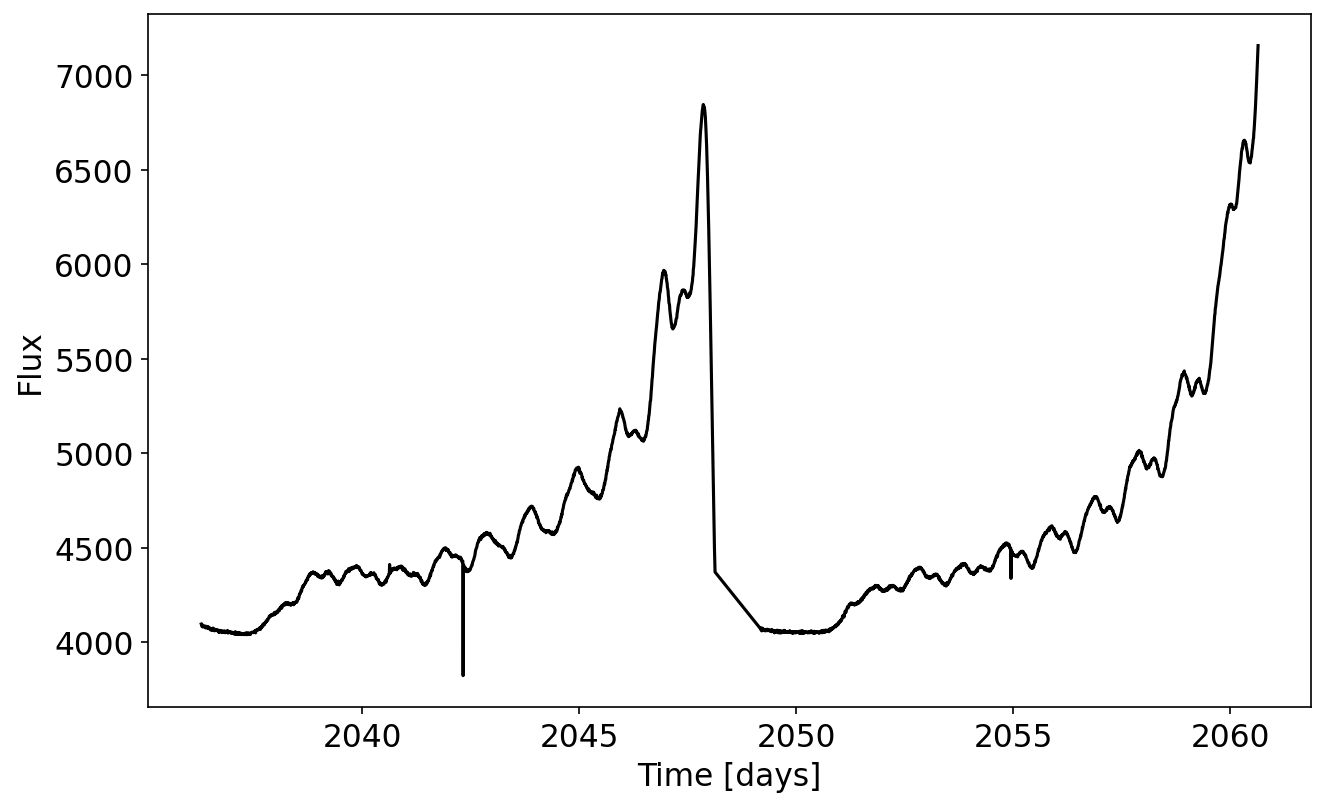

In [18]:
t,f,ferr = getTESSdata(5.7917735,-73.52396492)


plt.figure(figsize=(10,6))
plt.plot(t,f, 'k-')
plt.xlabel("Time [days]")
plt.ylabel("Flux")

In [19]:
frequency, power = LombScargle(t,f,ferr).autopower(minimum_frequency=0.01, maximum_frequency=10, samples_per_peak=20)

Text(0, 0.5, 'Power')

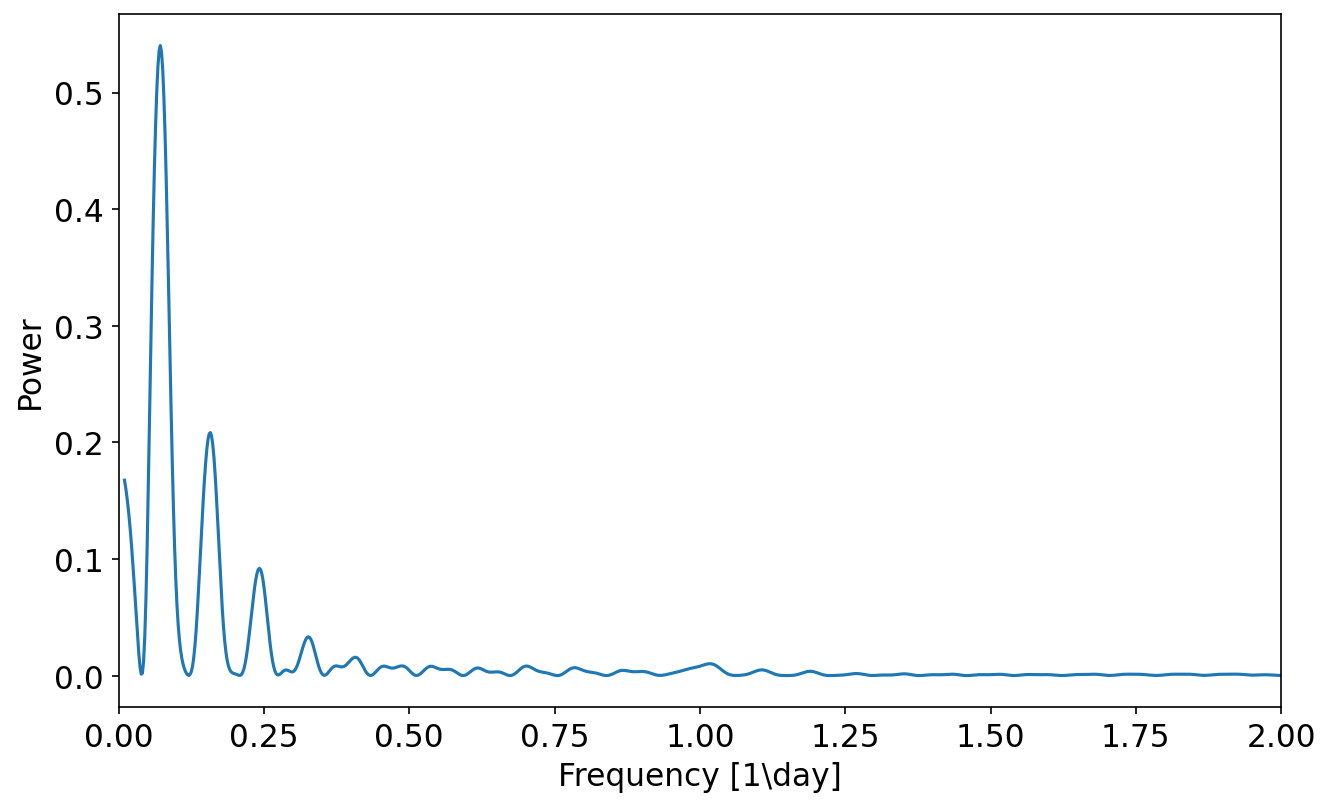

In [20]:
plt.figure(figsize=(10,6))
plt.plot(frequency, power)
plt.xlim(0,2)
plt.xlabel('Frequency [1\day]')
plt.ylabel('Power')

In [21]:
ind_max_power = power.argmax()
period = 1/frequency[ind_max_power]
print(period)

13.968333608467749


In [31]:
import astropy.io.ascii as ascii
cat = ascii.read('tess-cepheids.csv', format='csv', fast_reader=False,
                 names= ('Type','Name','TIC number','RA','Dec','M_RP' ))
  

In [32]:
cat.add_column(np.zeros(len(cat)), name='period', index=6)

In [33]:
cat

Type,Name,TIC number,RA,Dec,M_RP,period
str11,str28,int64,float64,float64,float64,float64
DCEP-F,RU Dor (OGLE LMC-CEP-4211),277316761,84.36790871,-66.62864148,14.045,0.0
DCEP-F,OGLE LMC-CEP-046,294670967,70.83688681,-69.22994857,14.09,0.0
DCEP-F,OGLE LMC-CEP-227,30033323,73.06543263,-70.24201219,14.626,0.0
DCEP-F,SX Tuc (OGLE SMC-CEP-3657),182729973,16.16673215,-72.31967806,15.54,0.0
DCEP-F,SW Tuc (OGLE SMC-CEP-3504),182517661,15.8665814,-72.77080623,15.548,0.0
DCEP-F,AT Tuc (OGLE SMC-CEP-0019),267184490,5.7917735,-73.52396492,15.782,0.0
...,...,...,...,...,...,...
ACEP-F,AV Gru,2027094382,334.1492302,-48.58412015,16.844,0.0
ACEP-1O,*XZ Cet,423761480,30.06944318,-16.34615519,8.947,0.0


### Exercise 1 - Pick a diffrent Cepheid from the above list

Pick a different Cepheid from the above list. write the name down below. you can pick a random number (n) and use that for cat['Name'][n] as long as it is in the list. Pick a number and go from there.

*student answer here*

### Exercise 2 - get the data using the function below for your Cepheid

Get the data using the function below for your Cepheid and plot the lightcurve.

In [1]:
# student work here


### Exercise 3 - Cepheid?

Have a look at the light curve look? Does it repeat? If not, maybe reconsider and pick a different catalog entry.

*student answer here*

### Exercise 4 - Period

Infer the period of your object. 

In [2]:
# student work here


### Exercise 5 - Period - Luminosity diagram

The Period-Luminosity relation is described like this:

$$ M = -2.43 \times (log_{10}(P) - 1) - 4.05 $$

where $M$ is the absolute magnitude of the star. The period $P$ is measured in days. 

What is your object's absolute magnitude?

In [3]:
# student work here


### Exercise 6 - Period - Luminosity diagram

The difference between the absolute magnitude ($M$) and the apparent magnitude ($m$). This is known as the distance modulus (M-m). The distance and the absolute and apparent magnitude is expressed as:

$$ M-m = -5 log_{10} (d_{pc}) + 5 $$

Inverting this, one can get the distance from:

$$ d = 10^{0.2(m-M+5)} $$ 

where the distance in parsec (this is 3.27 lightyears) but that is the unit astronomy uses. 
The apparent magnitude is in the M_RP column. Calculate the distance to your star. 

In [4]:
# student work here


# Cepheid distances for the catalog

We will now calculate these values for all the Cepheids. The next few exercise are for the full catalog. 
This will not just download the lightcurve for each but also calculate the period, derive the absolute magnitude, and the distance. 

In [5]:
plt.figure(figsize=(10,6))

cat['M'] = np.zeros(len(cat))

for i in range(len(cat)):
    t,f,ferr = getTESSdata(cat['RA'][i],cat['Dec'][i])
    frequency, power = LombScargle(t,f,ferr).autopower(minimum_frequency=0.01, maximum_frequency=10, samples_per_peak=20)
    ind_max_power = power.argmax()
    period = 1/frequency[ind_max_power]
    cat['period'][i] = period
    cat['M'][i] = -2.43*(np.log10(period)-1.) -4.05
    cat['Dist'][i] = 10.**(0.2*(cat['M_RP'][i]-cat['M'][i]+5.))
    print(period)
    plt.plot(t-np.min(t),f/np.max(f), 'C%d-' % (i % 10))
plt.xlabel("Time [days]")
plt.ylabel("Flux")
plt.show()

NameError: name 'plt' is not defined

### Exercise 7 - Period - Absolute Magnitude diagram

The Period-Luminosity relation is described like this:

$$ M = -2.43 \times (log_{10}(P) - 1) - 4.05 $$

where $M$ is the absolute magnitude of the star. The period $P$ is measured in days. 

Plot the catalog entries appropriately. Magnitudes are logarithmic. Plot the period logarithmic as well. 

In [6]:
# student work here


### Exercise 8 - Periodicities

Plot a histogram of the periods. What kind of Cepheids are the most common?

In [7]:
# student work here


### Exercise 9 - Periodicities

Plot the distance and apparent magnitude. Can you see a clean relation?

In [8]:
# student work here


### Exercise 10 - Period/distance

Plot the period-distance. Can you see a clean relation?

In [10]:
# student work here


# Using raw FFT

We can try the FFT of a lightcurve but the specialized algorithm has some ways to oversample. 

(-0.05, 2.0)

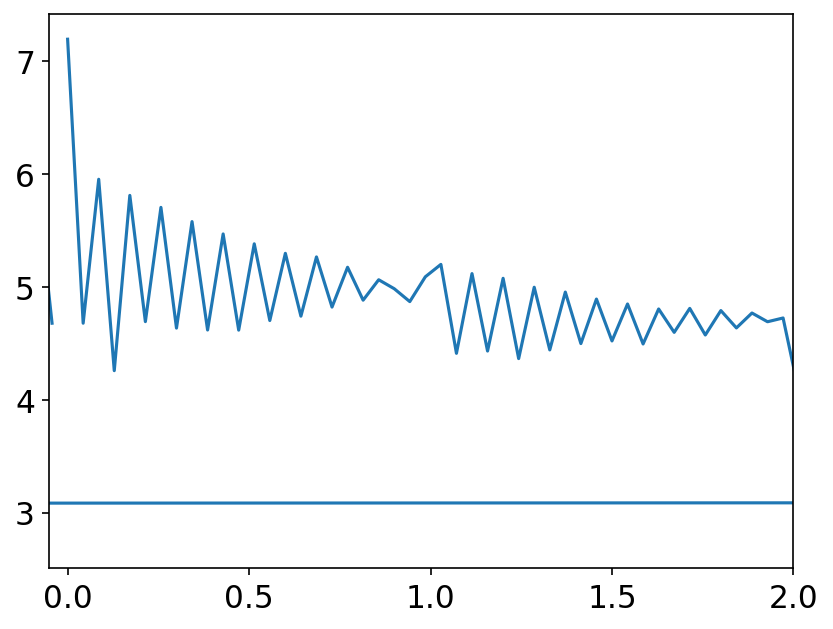

In [27]:
yf = np.fft.fft(f)

# Compute the frequencies
xf = np.fft.fftfreq(t.size, t[1] - t[0])
plt.plot(xf,np.log10(yf)) #/yf.max())
plt.xlim(-0.05,2)
